In [ ]:
#1. data collection
!pip install tensorflow matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
dataset= pd.read_csv('/content/all_stocks_5yr.csv')
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [ ]:
len(dataset)

328712

In [ ]:
df1= dataset.reset_index()['close']
df1.head()


df1.shape

(328712,)

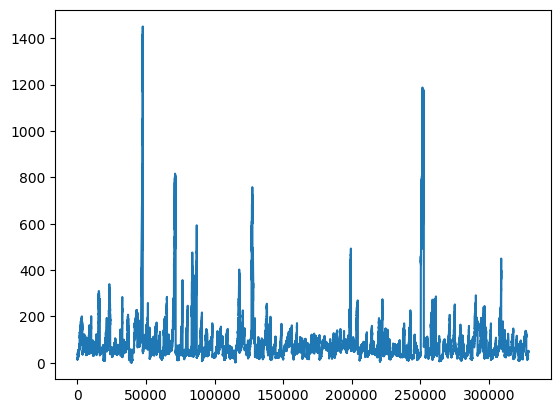

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform((np.array(df1)).reshape(-1,1))#reshape represents row and col
df1

array([[0.00908025],
       [0.00888015],
       [0.00874905],
       ...,
       [0.03347823],
       [0.03371283],
       [       nan]])

In [ ]:
def create_dataset(dataset, time_step=1):
    Xdata , Ydata=[], []
    for i in range(len(dataset)-time_step-1): # Fixed the range
        x = dataset[i:(i+time_step)] # Use time_step instead of seq_length
        y = dataset[i+time_step]
        Xdata.append(x)
        Ydata.append(y)
    return np.array(Xdata), np.array(Ydata)


SEQ_LENGTH=100
X,y=create_dataset(df1,SEQ_LENGTH)
print(X.shape)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

(328611, 100, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 320s 43ms/step - loss: 2.0101e-04 - val_loss: 4.3898e-05
Epoch 2/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 317s 43ms/step - loss: 1.7609e-05 - val_loss: 3.6029e-05
Epoch 3/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 326s 43ms/step - loss: 1.5192e-05 - val_loss: 3.7628e-05
Epoch 4/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 320s 43ms/step - loss: 1.9922e-05 - val_loss: 3.4808e-05
Epoch 5/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 323s 43ms/step - loss: 1.0947e-05 - val_loss: 3.6014e-05
Epoch 6/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 316s 43ms/step - loss: 1.1269e-05 - val_loss: 3.4702e-05
Epoch 7/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 324s 43ms/step - loss: 1.7693e-05 - val_loss: 3.3283e-05
Epoch 8/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 323s 43ms/step - loss: 1.0318e-05 - val_loss: 3.4213e-05
Epoch 9/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 332s 44ms/step - loss: 1.3826e-05 - val_loss: 3.6696e-05
Epoch 10/20
7394/7394 ━━━━━━━━━━━━━━━━━━━━ 321s 43ms/step - loss: 9.8153e-06 - val_loss: 5.3004e-05
Epoch 11/

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"test loss: {loss}")

2054/2054 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - loss: 3.0714e-06
test loss: 3.75367449123587e-06


In [ ]:
prediction = model.predict(X_test)
prediction.shape

2054/2054 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step


(65723, 1)

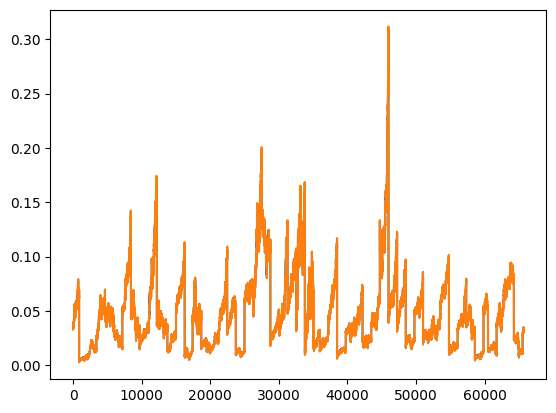

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(prediction , label ='prediction')
#plt.plot(df1, label='actual')
plt.show()

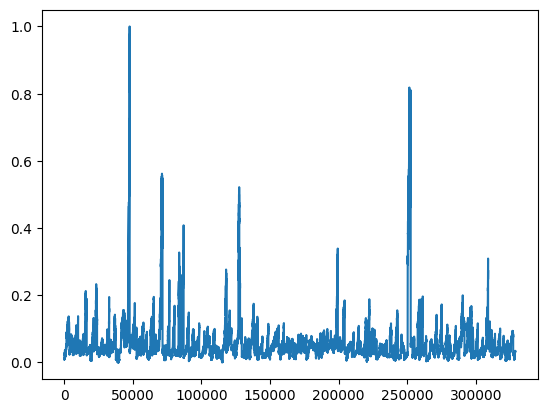

In [ ]:
plt.plot(df1)